In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("GoogleTrands_deepfake.csv", header=1)
df

,Month,deepfake: (Worldwide)
0,2013-01,<1
1,2013-02,0
2,2013-03,0
3,2013-04,0
4,2013-05,0
...,...,...
104,2021-09,67
105,2021-10,77
106,2021-11,78
107,2021-12,77


In [14]:
df.columns = ["month","search_freq"]

In [1]:
df

NameError: name 'df' is not defined

In [16]:
df.search_freq = df.search_freq.str.replace("<1","0.1")

In [17]:
df["search_freq"] = df.search_freq.astype(float)

In [18]:
df["month"] = pd.to_datetime(df["month"])

In [19]:
df.set_index("month", inplace=True)

<AxesSubplot:xlabel='month'>

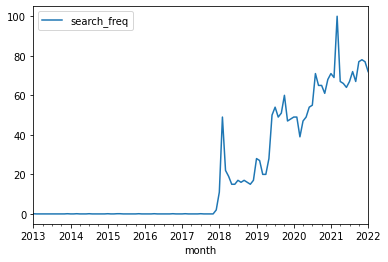

In [20]:
df.plot()

In [21]:
df[df.index.year >= 2018]

,search_freq
month,
2018-01-01,11.0
2018-02-01,49.0
2018-03-01,22.0
2018-04-01,19.0
2018-05-01,15.0
2018-06-01,15.0
2018-07-01,17.0
2018-08-01,16.0
2018-09-01,17.0


In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df[df.index.year >= 2018].search_freq).fit()
forecast = model.forecast(10)
forecast

/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-02-01    74.054018
2022-03-01    74.054018
2022-04-01    74.054018
2022-05-01    74.054018
2022-06-01    74.054018
2022-07-01    74.054018
2022-08-01    74.054018
2022-09-01    74.054018
2022-10-01    74.054018
2022-11-01    74.054018
Freq: MS, dtype: float64

/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:>

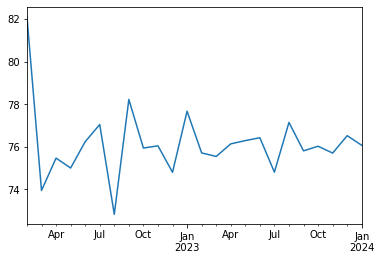

In [23]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df[df.index.year >= 2018].search_freq, order=(12,1,1)).fit()
forecast = model.forecast(24)
forecast.plot()

 ARIMA(0,1,1)(0,0,0)[0] intercept


<AxesSubplot:>

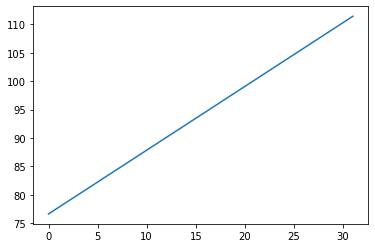

In [24]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

model = auto_arima(df[df.index.year >= 2018], start_p=0, start_q=0)
#model.fit(df)

def forecast_to_df(model, steps=32):
    forecast, conf_int = model.predict(n_periods=steps, return_conf_int=True)
    pred_df=pd.DataFrame()
    pred_df["lower"] = conf_int[:,0]
    pred_df["upper"] = conf_int[:,1]
    pred_df["pred"] = forecast.values
    return pred_df

pred_df = forecast_to_df(model)

print(model)

# Plotting Predictions
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots(figsize=(12,7))
    kws = dict(marker='o')
    
    ax.plot(train,label='Train',**kws)
    #ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['pred'],label='Prediction',ls='--',linewidth=3)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
    ax.set_title('Model Validation', fontsize=22)
    ax.legend(loc='upper left')
    fig.tight_layout()
    return fig,ax

#plot_train_test_pred(df, None, pred_df)

pred_df.pred.plot()

<AxesSubplot:xlabel='month'>

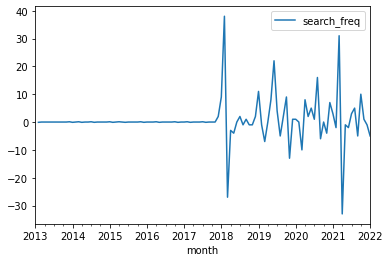

In [25]:
df.diff(1).plot()

<AxesSubplot:xlabel='month'>

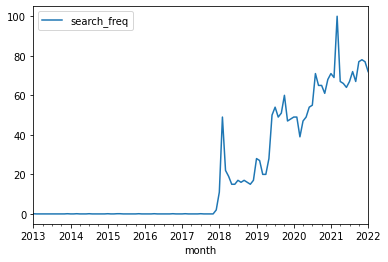

In [26]:
df.plot()

In [27]:
df.describe()

,search_freq
count,109.000000
mean,21.405505
std,28.194233
min,0.000000
25%,0.000000
50%,0.100000
75%,49.000000
max,100.000000
